In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy import random as rand

### Import Training Data

In [3]:
file_name1='D:/ASD/rocks/train_01.json'
file_name2='D:/ASD/rocks/train_02.json'

with open(file_name1, 'r') as jsonfile1:
    file1 = json.load(jsonfile1)

with open(file_name2, 'r') as jsonfile2:
    file2 = json.load(jsonfile2)
    
inside = np.array(file1['inside']) # class -1
outside = np.array(file1['outside']) # class 1

### Plot Training Data

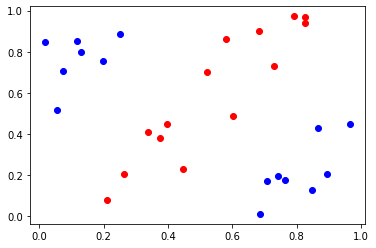

In [4]:
def plot_(ins,outs):
    R = []
    B = []
    for i in ins:
        R.append(i)
    for o in outs:
        B.append(o)
    R = np.array(R)
    B = np.array(B)
    plt.scatter(R.T[0],R.T[1], c='red')
    plt.scatter(B.T[0],B.T[1], c='blue')
    plt.show()

plot_(inside,outside)

In [5]:
# формуємо вектор змінних
def x_vector(x1, x2):
    v = np.array([1, x1, x2, x1*x1, x1*x2, x2*x1, x2*x2])
    return v

# утворюємо вектор з вектору змінних і класу, якому він належить
def Tfunc(x, k):
    x1 = x[0]
    x2 = x[1]
    v = x_vector(x1, x2)
    T = [v, k]
    return T

# даємо векторам з нашої навчальної вибірки клас "-1" або "1"
def class_init(ins, outs):
    T = [] 
    for i in ins:
        T.append(Tfunc(i, -1))
    for o in outs:
        T.append(Tfunc(o, 1))
    return T
    
# запускаємо ініціалізацію даних класами
T = class_init(inside, outside)

In [6]:
# функція для формування вектора з власних векторів
def eig_vector(C):
    s11,s12,s21,s22 = C[3:7] # з вектора констант видобуваємо значення елементів коваріаційної матриці
    cov = np.array([[s11, s12], # формуємо коваріаційну матрицю
                   [s21, s22]])
    w, v = LA.eig(cov) # запускаємо вбудовану функцію для знаходження власних чисел і власних векторів
    v1 = v[:][0] # перший власний вектор
    v2 = v[:][1] # другий власний вектор
    T1 = []
    if (w[0] <= 0):
        T1.append([np.array([0,0,0,v1[0]*v1[0],v1[0]*v1[1],v1[1]*v1[0],v1[1]*v1[1]]),1]) # формуємо вектор з першого власного вектора
    if (w[1] <= 0):
        T1.append([np.array([0,0,0,v2[0]*v2[0],v2[0]*v2[1],v2[1]*v2[0],v2[1]*v2[1]]),1]) # і другого
    return T1

### Perceptron

In [7]:
def customPerceptron(C, T):
    T.extend(eig_vector(C)) # додаємо додаткові дані
    for t in T:
        ckx = np.dot(t[0], C)*t[1] # ckx
        if ckx<=0:
            C1 = t[0]*t[1]+C
            C = customPerceptron(C1, T) # рекурсивно переходимо на наступні ітерації
            break
    return C

In [8]:
C0 = np.zeros(7) # початкове наближення - нульова матриця
R = customPerceptron(C0, T) # запускаємо персепторн для 1го набору даних
print(R)

[-1.         -0.56091189  0.43064313  9.72579488 -7.17206107 -7.17206107
  6.06496566]


### Perceptron Visualization

In [9]:
def f(x1,x2,C):
    return np.dot(C,x_vector(x1,x2))  # рівняння роздільної площини

def plot_p(ins,outs,C,lim):
    R = []
    B = []
    for i in ins:
        R.append(i)
    for o in outs:
        B.append(o)
    R = np.array(R)
    B = np.array(B)
    plt.scatter(R.T[0],R.T[1], c='red')
    plt.scatter(B.T[0],B.T[1], c='blue')
    t = np.arange(lim[0],lim[1],0.01)
    U,V = np.meshgrid(t,t)
    Fs = np.array(f(np.ravel(U),np.ravel(V),C))
    F = Fs.reshape(U.shape)
    plt.contour(U,V,F,levels=[0],colors=['green'])
    plt.show()

C:\Users\E786~1\AppData\Local\Temp/ipykernel_384/1394262593.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array([1, x1, x2, x1*x1, x1*x2, x2*x1, x2*x2])


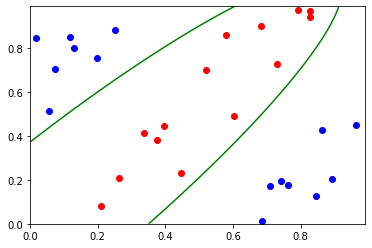

In [10]:
lim = np.array([0,1])    
plot_p(inside,outside,R,lim)

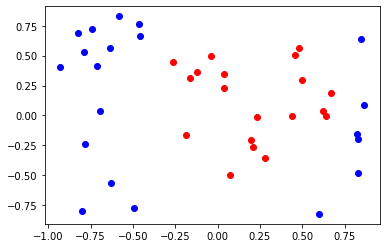

C:\Users\E786~1\AppData\Local\Temp/ipykernel_384/1394262593.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array([1, x1, x2, x1*x1, x1*x2, x2*x1, x2*x2])


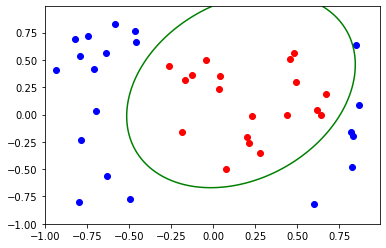

In [11]:
inside = np.array(file2['inside'])
outside = np.array(file2['outside'])
plot_(inside,outside)
T = class_init(inside, outside)
R = customPerceptron(C0, T)
lim = np.array([-1,1])    
plot_p(inside,outside,R,lim)

In [12]:
# Робимо власну вибірку з х1 й х2 з відповідними розподілами N(0.25, 0.2), N(0, 0.25)
def randomSet(n, mu1, sigma1, mu2, sigma2):
    M = np.zeros((n, 2))
    for i in M:
        for j in np.arange(len(i)):
            if j==0:
                i[j]= np.random.normal(mu1, sigma1)
            if j==1:
                i[j] = np.random.normal(mu2, sigma2)
    return M

rand_inside = randomSet(20, 0.25, 0.2, 0, 0.25)
rand_outside1 = randomSet(20, 0, 0.1, 1, 0.1)
rand_outside2 = randomSet(20, 1, 0.1, 0, 0.1)

### Perceptron Test

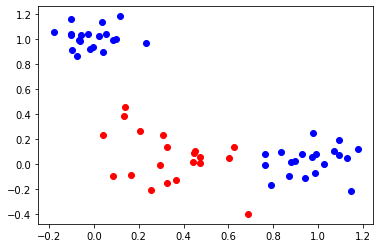

C:\Users\E786~1\AppData\Local\Temp/ipykernel_384/1394262593.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array([1, x1, x2, x1*x1, x1*x2, x2*x1, x2*x2])


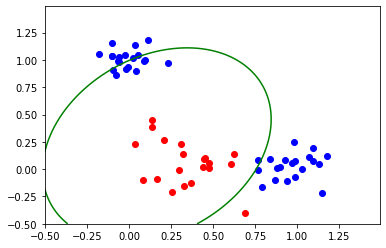

In [18]:
# використовуємо персептрон, натренований на 2-й вібірці, щоб класифікувати рандомні вектори
inside =[]
outside = []
for i in np.arange(20):
    inside.append(rand_inside[i])
    outside.append(rand_outside1[i])
    outside.append(rand_outside2[i])
inside = np.array(inside)
outside = np.array(outside)
plot_(inside,outside)
lim = np.array([-0.5,1.5]) 
plot_p(inside,outside,R,lim)